In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import statsmodels.formula.api as smf

%matplotlib inline

## Importing, filtering and normalizing datasets

Importing **DMSO 24hr expt3** as **adata_ref** and **Trametinib 24hr expt3** as **adata**.

In [2]:
adata_ref =sc.read_10x_mtx('../data/DMSO_24hr_expt3/') 

In [3]:
adata = sc.read_10x_mtx('../data/Trametinib_24hr_expt3/')

In [4]:
adata_ref.strings_to_categoricals()
adata.strings_to_categoricals()

Creating dataframe.

In [5]:
adata_ref.to_df()  
adata.to_df()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACCTGAGAAGGACA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGCTGATAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGTCCTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGTCGTTTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCAAGGCTCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCAACACGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCAGCTTAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCCGTTGTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCCTAGGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Filtering out cells that contain less than 200 detected genes. Filtering out genes that have been detected in less than 3 cells.

In [6]:
sc.pp.filter_cells(adata_ref, min_genes=200)
sc.pp.filter_genes(adata_ref, min_cells=3)

sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Annotating the group of mitochondrial genes as 'mt', then filtering out mitochondrial genes. The values have been adjusted according to the scatter plots seen in the exploratory notebooks.

In [7]:
adata_ref.var['mt'] = adata_ref.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata_ref, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata.var['mt'] = adata.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [8]:
adata_ref = adata_ref[adata_ref.obs.n_genes_by_counts < 8000, :] 
adata_ref = adata_ref[adata_ref.obs.pct_counts_mt < 20, :]

adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]

Normalizing and logarithmizing. Defining the data on the same variables to be able to run `sc.tl.ingest`. Running principal component analysis (PCA), computing the neighborhood graph, embedding the graph in two dimensions using <a href="https://arxiv.org/abs/1802.03426" target="_blank">UMAP</a>.

In [9]:
sc.pp.normalize_total(adata_ref, target_sum=1e4)
sc.pp.normalize_total(adata, target_sum=1e4)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [10]:
sc.pp.log1p(adata_ref)
sc.pp.log1p(adata)

In [11]:
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]

In [12]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [13]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

## Adding metadata

Metadata is included from both the *Classifications.csv* files and the <a href="https://depmap.org/portal/download/" target="_blank">DepMap</a> database. Necessary datasets to download from DepMap linked below.
Specifying **meta_ref** as **DMSO 24h expt3 metadata** and **meta** as **Trametinib 24h expt3 metadata**. Metadata are added to adata.

In [14]:
meta_ref = pd.read_csv('../data/DMSO_24hr_expt3/classifications.csv', sep=',', header=0, index_col=0)

In [15]:
adata_ref.obs['Cell type'] = meta_ref.loc[adata_ref.obs.index, 'singlet_ID']

In [16]:
meta = pd.read_csv('../data/Trametinib_24hr_expt3/classifications.csv', sep=',', header=0, index_col=0)

In [17]:
adata.obs['Cell type'] = meta.loc[adata.obs.index, 'singlet_ID']

In [18]:
adata.obs['DepMap_ID'] = meta.loc[adata.obs.index, 'DepMap_ID']
adata_ref.obs['DepMap_ID'] = meta_ref.loc[adata_ref.obs.index, 'DepMap_ID']

... storing 'Cell type' as categorical
... storing 'DepMap_ID' as categorical


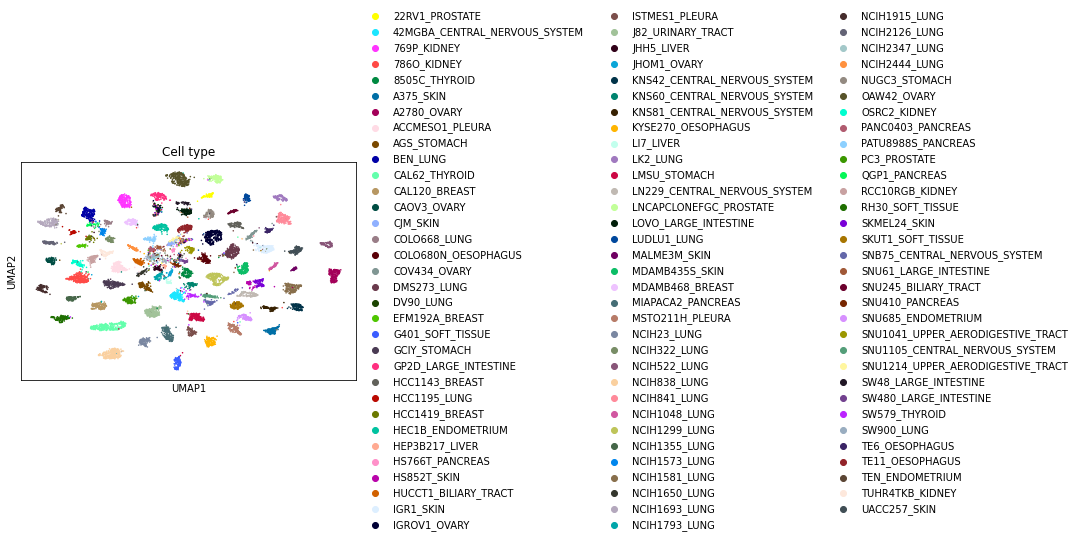

In [19]:
sc.pl.umap(adata, color='Cell type') 

... storing 'Cell type' as categorical
... storing 'DepMap_ID' as categorical


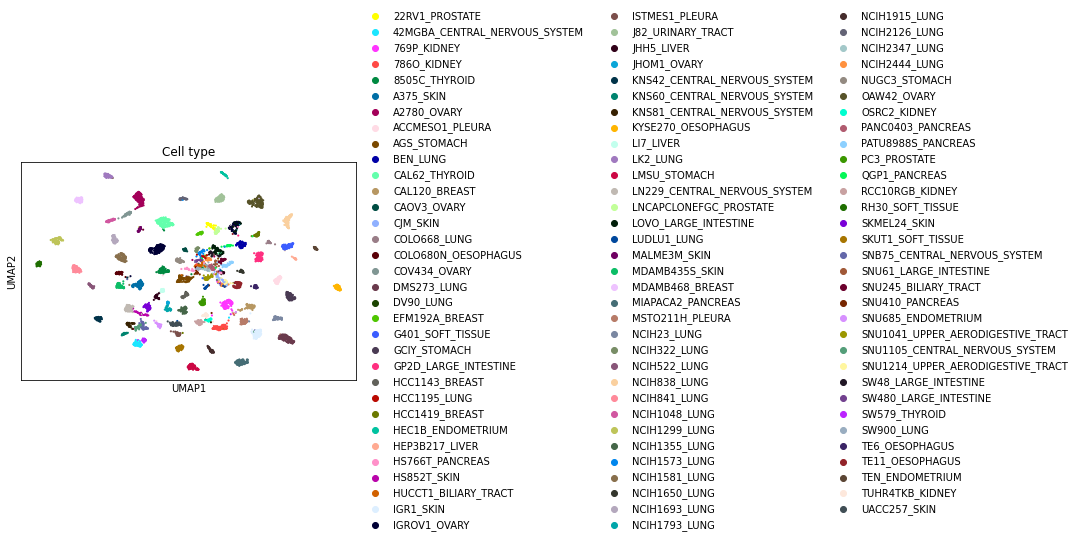

In [20]:
sc.pl.umap(adata_ref, color='Cell type') 

Since the dataset contains plenty of cell lines, we add *'Tissue type'* to dataframes.

In [21]:
f = lambda x: x.split('_', 1  ) [1]
adata_ref.obs['Tissue type'] = adata_ref.obs['Cell type'].apply( f )

In [22]:
f = lambda x: x.split('_', 1  ) [1]
adata.obs['Tissue type'] = adata.obs['Cell type'].apply( f )

... storing 'Tissue type' as categorical


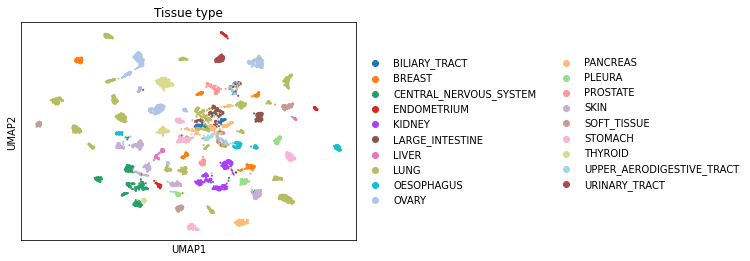

In [23]:
sc.pl.umap(adata_ref, color='Tissue type') 

... storing 'Tissue type' as categorical


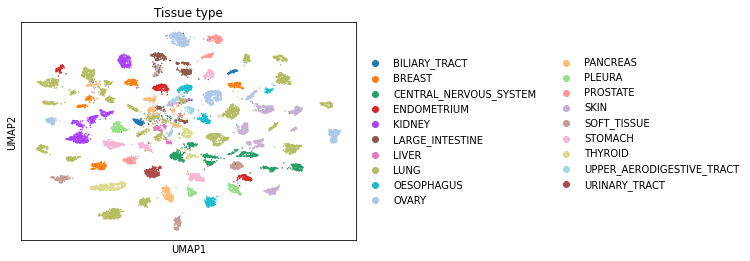

In [24]:
sc.pl.umap(adata, color='Tissue type') 

## Filtering MAPK genes, adding mutation counts

DepMap dataset <a href="https://ndownloader.figshare.com/files/26261527" target="_blank">CCLE_mutations.csv </a> to download.

Since Trametinib is a mitogen-activated protein kinase kinase inhibitor, we are filtering for MAPK genes.

In [25]:
mut = pd.read_csv('../data/DepMap/CCLE_mutations.csv', sep='\t', header=0, index_col=None)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [26]:
fil = np.in1d(mut['Hugo_Symbol'], ['BRAF', 'KRAS', 'NRAS', 'HRAS'])   
mut = mut[fil]
mut

,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,...,ExAC_AF,CGA_WES_AC,SangerWES_AC,SangerRecalibWES_AC,RNAseq_AC,HC_AC,RD_AC,WGS_AC,Variant_annotation,DepMap_ID
121592,BRAF,673,37,7,140434423,140434423,+,Nonsense_Mutation,SNP,C,...,NaN,NaN,68:432,107:634,NaN,NaN,NaN,NaN,damaging,ACH-002121
121593,BRAF,673,37,7,140434435,140434435,+,Missense_Mutation,SNP,T,...,NaN,84:190,NaN,NaN,NaN,NaN,NaN,NaN,other non-conserving,ACH-001960
121594,BRAF,673,37,7,140434458,140434458,+,Missense_Mutation,SNP,G,...,NaN,NaN,129:342,133:357,7:24,NaN,NaN,NaN,other non-conserving,ACH-000962
121595,BRAF,673,37,7,140434458,140434458,+,Missense_Mutation,SNP,G,...,NaN,95:263,NaN,NaN,NaN,7:41,NaN,NaN,other non-conserving,ACH-001145
121596,BRAF,673,37,7,140434475,140434475,+,Silent,SNP,C,...,NaN,NaN,NaN,70:416,NaN,NaN,NaN,NaN,silent,ACH-000786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747719,NRAS,4893,37,1,115258748,115258748,+,Missense_Mutation,SNP,C,...,NaN,NaN,33:97,32:93,NaN,65:241,NaN,NaN,other non-conserving,ACH-001127
747720,NRAS,4893,37,1,115258748,115258748,+,Missense_Mutation,SNP,C,...,NaN,NaN,54:89,53:91,289:272,104:143,NaN,NaN,other non-conserving,ACH-000937
747721,NRAS,4893,37,1,115258748,115258748,+,Missense_Mutation,SNP,C,...,NaN,NaN,55:61,52:57,NaN,NaN,NaN,NaN,other non-conserving,ACH-002241
747722,NRAS,4893,37,1,115258767,115258767,+,Silent,SNP,T,...,NaN,NaN,72:269,68:248,88:746,NaN,NaN,NaN,silent,ACH-000319


In [27]:
mut['Variant_Classification'].value_counts()

Missense_Mutation    588
Silent               119
Splice_Site           14
Frame_Shift_Del       12
In_Frame_Del           7
Nonsense_Mutation      3
Frame_Shift_Ins        3
In_Frame_Ins           3
Name: Variant_Classification, dtype: int64

Keeping activating missense mutations since they affect the function of Trametinib.

In [28]:
fil = mut['Variant_Classification'] == 'Missense_Mutation'
mut1 = mut[fil]

Verifying mutation counts by DepMap IDs.

In [29]:
mut_count = mut['DepMap_ID'].value_counts()
mut_count

ACH-000992    48
ACH-000786    25
ACH-001094     6
ACH-000810     5
ACH-000981     5
              ..
ACH-000921     1
ACH-000329     1
ACH-000162     1
ACH-001716     1
ACH-000736     1
Name: DepMap_ID, Length: 558, dtype: int64

Adding mutation counts to dataframes as *'MAPK_mut_count'*.

In [30]:
common_cells = list(set(adata.obs['DepMap_ID']) & set(mut_count.index))
adata.obs['MAPK_mut_count'] = 0
fil = np.in1d(adata.obs['DepMap_ID'], common_cells)
adata.obs.loc[adata.obs.index[fil], 'MAPK_mut_count'] = mut_count[adata.obs['DepMap_ID'][fil].values].values

In [31]:
common_cells = list(set(adata_ref.obs['DepMap_ID']) & set(mut_count.index))
adata_ref.obs['MAPK_mut_count'] = 0
fil = np.in1d(adata_ref.obs['DepMap_ID'], common_cells)
adata_ref.obs.loc[adata_ref.obs.index[fil], 'MAPK_mut_count'] =\
    mut_count[adata_ref.obs['DepMap_ID'][fil].values].values

In [32]:
adata_ref.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,Cell type,DepMap_ID,Tissue type,MAPK_mut_count
AAACCTGAGAGCAATT-1,5984,5982,47009.0,2072.0,4.407667,UACC257_SKIN,ACH-000579,SKIN,1
AAACCTGAGATCTGAA-1,6890,6890,68559.0,5358.0,7.815166,HEC1B_ENDOMETRIUM,ACH-000941,ENDOMETRIUM,3
AAACCTGCACACTGCG-1,5473,5472,41918.0,1544.0,3.683382,LOVO_LARGE_INTESTINE,ACH-000950,LARGE_INTESTINE,2
AAACCTGCACCAGATT-1,6429,6429,58468.0,1795.0,3.070055,COLO680N_OESOPHAGUS,ACH-000717,OESOPHAGUS,0
AAACCTGCAGCTCGAC-1,7269,7269,63829.0,1734.0,2.716634,KYSE270_OESOPHAGUS,ACH-000873,OESOPHAGUS,0
...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGCAACGA-1,6105,6104,43790.0,3959.0,9.040877,BEN_LUNG,ACH-000603,LUNG,0
TTTGTCAGTTCAACCA-1,5320,5319,33704.0,1985.0,5.889509,RH30_SOFT_TISSUE,ACH-000833,SOFT_TISSUE,0
TTTGTCATCATTGCCC-1,7225,7225,67526.0,5214.0,7.721470,IGROV1_OVARY,ACH-000966,OVARY,0
TTTGTCATCGCAGGCT-1,6286,6286,37616.0,2180.0,5.795406,KNS42_CENTRAL_NERVOUS_SYSTEM,ACH-000622,CENTRAL_NERVOUS_SYSTEM,0


## Adding copy number variation

DepMap dataset <a href="https://ndownloader.figshare.com/files/26261524" target="_blank">CCLE_gene_cn.csv </a> to download.

In [33]:
cnv = pd.read_csv('../data/DepMap/CCLE_gene_cn.csv', sep=',', header=0, index_col=0)

Filtering MAPK genes.

In [34]:
cnv_BRAF = cnv.loc[:,cnv.columns.str.startswith("BRAF")]
cnv_BRAF 

,BRAF (673)
ACH-000001,1.046850
ACH-000002,1.004020
ACH-000003,1.091531
ACH-000004,0.816365
ACH-000005,0.831232
...,...
ACH-002510,1.351090
ACH-002511,1.678063
ACH-001421,0.976895
ACH-001711,1.089226


In [35]:
cnv_BRAF = cnv_BRAF['BRAF (673)']
cnv_BRAF

ACH-000001    1.046850
ACH-000002    1.004020
ACH-000003    1.091531
ACH-000004    0.816365
ACH-000005    0.831232
                ...   
ACH-002510    1.351090
ACH-002511    1.678063
ACH-001421    0.976895
ACH-001711    1.089226
ACH-001656    0.610982
Name: BRAF (673), Length: 1745, dtype: float64

In [36]:
cnv_KRAS = cnv.loc[:,cnv.columns.str.startswith("KRAS")]
cnv_KRAS

,KRAS (3845)
ACH-000001,1.146624
ACH-000002,0.994210
ACH-000003,1.245132
ACH-000004,1.074006
ACH-000005,1.126038
...,...
ACH-002510,1.379501
ACH-002511,0.630726
ACH-001421,0.976324
ACH-001711,1.094477


In [37]:
cnv_KRAS = cnv_KRAS['KRAS (3845)']
cnv_KRAS

ACH-000001    1.146624
ACH-000002    0.994210
ACH-000003    1.245132
ACH-000004    1.074006
ACH-000005    1.126038
                ...   
ACH-002510    1.379501
ACH-002511    0.630726
ACH-001421    0.976324
ACH-001711    1.094477
ACH-001656    1.041681
Name: KRAS (3845), Length: 1745, dtype: float64

In [38]:
cnv_NRAS = cnv.loc[:,cnv.columns.str.startswith("NRAS")]
cnv_NRAS

,NRAS (4893)
ACH-000001,1.432613
ACH-000002,1.009073
ACH-000003,0.689230
ACH-000004,1.082798
ACH-000005,1.110107
...,...
ACH-002510,0.708653
ACH-002511,0.945478
ACH-001421,0.975735
ACH-001711,1.121632


In [39]:
cnv_NRAS = cnv_NRAS['NRAS (4893)']
cnv_NRAS 

ACH-000001    1.432613
ACH-000002    1.009073
ACH-000003    0.689230
ACH-000004    1.082798
ACH-000005    1.110107
                ...   
ACH-002510    0.708653
ACH-002511    0.945478
ACH-001421    0.975735
ACH-001711    1.121632
ACH-001656    1.036999
Name: NRAS (4893), Length: 1745, dtype: float64

In [40]:
cnv_HRAS = cnv.loc[:,cnv.columns.str.startswith("HRAS")]
cnv_HRAS

,HRAS (3265)
ACH-000001,0.756759
ACH-000002,0.996967
ACH-000003,1.104372
ACH-000004,0.830062
ACH-000005,0.833802
...,...
ACH-002510,1.194098
ACH-002511,1.028324
ACH-001421,0.985983
ACH-001711,1.127647


In [41]:
cnv_HRAS = cnv_HRAS['HRAS (3265)']
cnv_HRAS 

ACH-000001    0.756759
ACH-000002    0.996967
ACH-000003    1.104372
ACH-000004    0.830062
ACH-000005    0.833802
                ...   
ACH-002510    1.194098
ACH-002511    1.028324
ACH-001421    0.985983
ACH-001711    1.127647
ACH-001656    0.671628
Name: HRAS (3265), Length: 1745, dtype: float64

Adding MAPK genes (BRAF, KRAS, HRAS, NRAS) copy number variation to dataframes as *'BRAF_cnv'*, *'KRAS_cnv'*, *'HRAS_cnv'*, *'KRAS_cnv'*.

In [42]:
adata.obs['BRAF_cnv'] = adata.obs['DepMap_ID'].map(cnv_BRAF)
adata_ref.obs['BRAF_cnv'] = adata_ref.obs['DepMap_ID'].map(cnv_BRAF)

In [43]:
adata.obs['KRAS_cnv'] = adata.obs['DepMap_ID'].map(cnv_KRAS)
adata_ref.obs['KRAS_cnv'] = adata_ref.obs['DepMap_ID'].map(cnv_KRAS)

In [44]:
adata.obs['HRAS_cnv'] = adata.obs['DepMap_ID'].map(cnv_HRAS)
adata_ref.obs['HRAS_cnv'] = adata_ref.obs['DepMap_ID'].map(cnv_HRAS)

In [45]:
adata.obs['NRAS_cnv'] = adata.obs['DepMap_ID'].map(cnv_NRAS)
adata_ref.obs['NRAS_cnv'] = adata_ref.obs['DepMap_ID'].map(cnv_NRAS)

In [46]:
adata_ref.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,Cell type,DepMap_ID,Tissue type,MAPK_mut_count,BRAF_cnv,KRAS_cnv,HRAS_cnv,NRAS_cnv
AAACCTGAGAGCAATT-1,5984,5982,47009.0,2072.0,4.407667,UACC257_SKIN,ACH-000579,SKIN,1,1.082413,1.027283,0.937595,1.083374
AAACCTGAGATCTGAA-1,6890,6890,68559.0,5358.0,7.815166,HEC1B_ENDOMETRIUM,ACH-000941,ENDOMETRIUM,3,1.114512,1.102715,0.875030,1.084277
AAACCTGCACACTGCG-1,5473,5472,41918.0,1544.0,3.683382,LOVO_LARGE_INTESTINE,ACH-000950,LARGE_INTESTINE,2,1.078604,1.196118,1.011962,0.967712
AAACCTGCACCAGATT-1,6429,6429,58468.0,1795.0,3.070055,COLO680N_OESOPHAGUS,ACH-000717,OESOPHAGUS,0,0.816903,1.177003,0.932287,1.024539
AAACCTGCAGCTCGAC-1,7269,7269,63829.0,1734.0,2.716634,KYSE270_OESOPHAGUS,ACH-000873,OESOPHAGUS,0,0.791402,1.188764,0.881253,1.383123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGCAACGA-1,6105,6104,43790.0,3959.0,9.040877,BEN_LUNG,ACH-000603,LUNG,0,1.007589,4.130631,1.146235,0.632206
TTTGTCAGTTCAACCA-1,5320,5319,33704.0,1985.0,5.889509,RH30_SOFT_TISSUE,ACH-000833,SOFT_TISSUE,0,1.134156,1.006819,1.005368,1.043694
TTTGTCATCATTGCCC-1,7225,7225,67526.0,5214.0,7.721470,IGROV1_OVARY,ACH-000966,OVARY,0,1.077024,0.985956,0.928437,1.017333
TTTGTCATCGCAGGCT-1,6286,6286,37616.0,2180.0,5.795406,KNS42_CENTRAL_NERVOUS_SYSTEM,ACH-000622,CENTRAL_NERVOUS_SYSTEM,0,1.037007,1.019529,0.718637,1.299414


## Adding pathway activity

Pathway activities have been calculated. See files: **PROGENy_DMSO_24h_expt3.R** and **PROGENy_Trametinib_24h_expt3.R**.

In [47]:
pw_dmso = pd.read_csv('../results/pw_activity_dmso_24h_expt3.csv', sep=',', header=0, index_col=0)
pw_treated = pd.read_csv('../results/pw_activity_trametinib_24h_expt3.csv', sep=',', header=0, index_col=0)

In [48]:
adata.obs['MAPK_activity'] = pw_treated['MAPK']
adata_ref.obs['MAPK_activity'] = pw_dmso['MAPK']

## Integrating datasets

In [49]:
sc.tl.ingest(adata, adata_ref, obs='Tissue type')

Creating a new variable named **adata_concat** that stores the integrated data. We will be using this dataframe from now on.

In [50]:
adata_concat = adata_ref.concatenate(adata, batch_categories=['DMSO', 'Trametinib'])

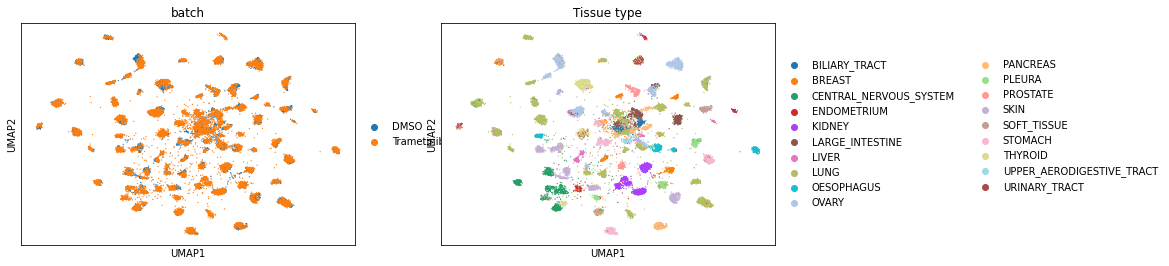

In [51]:
 sc.pl.umap(adata_concat, color=['batch', 'Tissue type'])

In [52]:
adata_concat.obs['BRAF_cnv']= adata_concat.obs['BRAF_cnv'].astype('float64')
adata_concat.obs['KRAS_cnv']= adata_concat.obs['KRAS_cnv'].astype('float64')
adata_concat.obs['NRAS_cnv']= adata_concat.obs['NRAS_cnv'].astype('float64')
adata_concat.obs['HRAS_cnv']= adata_concat.obs['HRAS_cnv'].astype('float64')

In [53]:
adata_concat.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,Cell type,DepMap_ID,Tissue type,MAPK_mut_count,BRAF_cnv,KRAS_cnv,HRAS_cnv,NRAS_cnv,MAPK_activity,batch
AAACCTGAGAGCAATT-1-DMSO,5984,5982,47009.0,2072.0,4.407667,UACC257_SKIN,ACH-000579,SKIN,1,1.082413,1.027283,0.937595,1.083374,-0.216134,DMSO
AAACCTGAGATCTGAA-1-DMSO,6890,6890,68559.0,5358.0,7.815166,HEC1B_ENDOMETRIUM,ACH-000941,ENDOMETRIUM,3,1.114512,1.102715,0.875030,1.084277,0.687991,DMSO
AAACCTGCACACTGCG-1-DMSO,5473,5472,41918.0,1544.0,3.683382,LOVO_LARGE_INTESTINE,ACH-000950,LARGE_INTESTINE,2,1.078604,1.196118,1.011962,0.967712,-0.406762,DMSO
AAACCTGCACCAGATT-1-DMSO,6429,6429,58468.0,1795.0,3.070055,COLO680N_OESOPHAGUS,ACH-000717,OESOPHAGUS,0,0.816903,1.177003,0.932287,1.024539,0.621545,DMSO
AAACCTGCAGCTCGAC-1-DMSO,7269,7269,63829.0,1734.0,2.716634,KYSE270_OESOPHAGUS,ACH-000873,OESOPHAGUS,0,0.791402,1.188764,0.881253,1.383123,0.147986,DMSO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCAACACGT-1-Trametinib,2683,2683,9311.0,704.0,7.560950,MDAMB435S_SKIN,ACH-000884,SKIN,1,1.180420,0.886588,1.151228,0.882387,0.717487,Trametinib
TTTGTCATCAGCTTAG-1-Trametinib,2621,2621,10844.0,406.0,3.744006,CAL62_THYROID,ACH-000174,THYROID,1,1.083445,0.979205,1.100098,0.858613,-0.740604,Trametinib
TTTGTCATCCGTTGTC-1-Trametinib,4519,4519,25196.0,1229.0,4.877759,SNU1041_UPPER_AERODIGESTIVE_TRACT,ACH-000618,UPPER_AERODIGESTIVE_TRACT,0,0.640076,1.016922,0.936453,1.013197,1.193702,Trametinib
TTTGTCATCCTAGGGC-1-Trametinib,2039,2039,8226.0,342.0,4.157549,SNU1041_UPPER_AERODIGESTIVE_TRACT,ACH-000618,UPPER_AERODIGESTIVE_TRACT,0,0.640076,1.016922,0.936453,1.013197,-1.190539,Trametinib


# Visualization

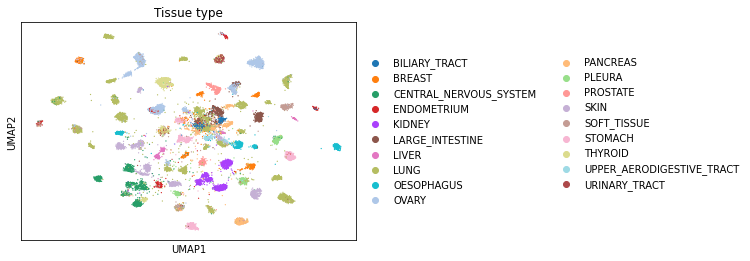

In [54]:
sc.pl.umap(adata_concat, color = 'Tissue type')

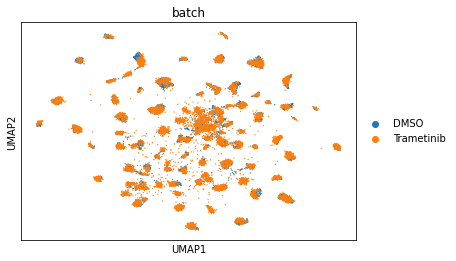

In [55]:
sc.pl.umap(adata_concat, color=['batch'])

The batches are comparable to MAPK activity. The MAPK genes mutation count, the individual BRAF, KRAS, HRAS, NRAS copy number variations and the mutation counts are also depicted.

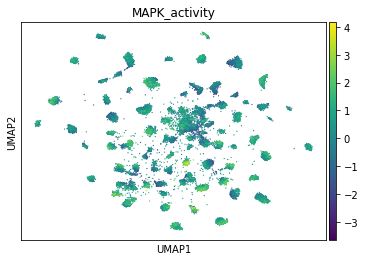

In [56]:
sc.pl.umap(adata_concat, color=['MAPK_activity']) 

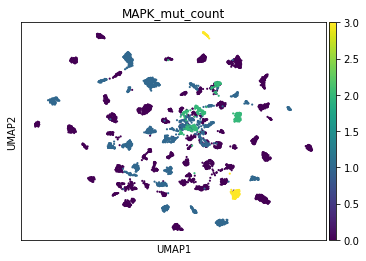

In [57]:
sc.pl.umap(adata_ref, color= [ 'MAPK_mut_count'])

## Assessing MAPK activity

Calculating the correlation between mutation counts and MAPK activity.

In [58]:
pearsonr(adata_concat.obs['MAPK_activity'], adata_concat.obs['MAPK_mut_count'])

(-0.1029233413307217, 2.7932070306953225e-45)

Plotting the MAPK activity in regard to the batches and mutation counts.

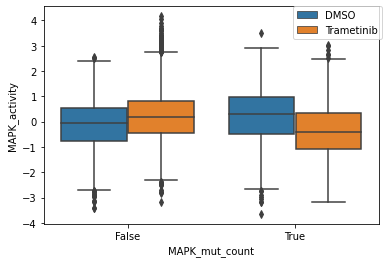

In [59]:
sns.boxplot(hue=adata_concat.obs['batch'], y=adata_concat.obs['MAPK_activity'], 
            x=adata_concat.obs['MAPK_mut_count']>0)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

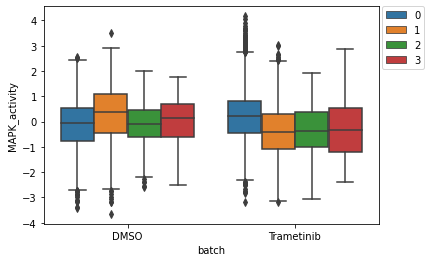

In [60]:
sns.boxplot(hue=adata_concat.obs['MAPK_mut_count'], y=adata_concat.obs['MAPK_activity'], 
            x=adata_concat.obs['batch'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [61]:
#adata_concat.obs['MAPK_mut_count'] = (adata_concat.obs['MAPK_mut_count']>0)*1

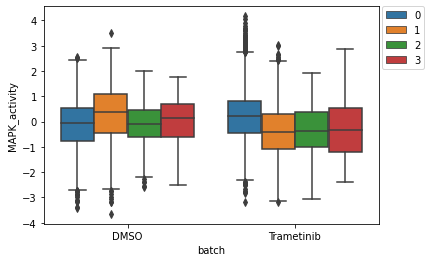

In [62]:
sns.boxplot(hue=adata_concat.obs['MAPK_mut_count'], y=adata_concat.obs['MAPK_activity'], 
            x=adata_concat.obs['batch'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

MAPK genes (BRAF, KRAS, NRAS, HRAS) and their copy number variations showed in UMAP.

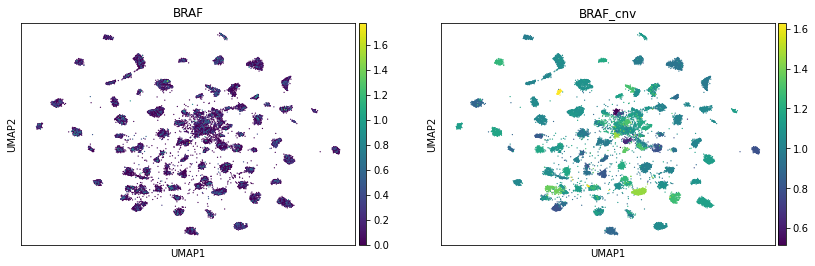

In [63]:
sc.pl.umap(adata_concat, color=['BRAF', 'BRAF_cnv'])

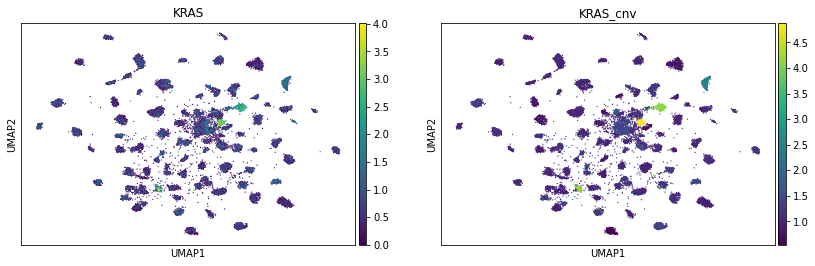

In [64]:
sc.pl.umap(adata_concat, color=['KRAS', 'KRAS_cnv'])

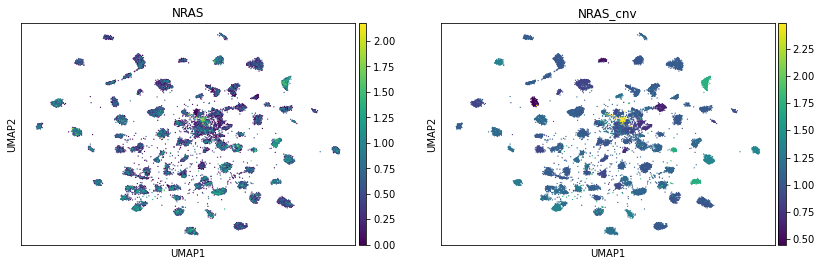

In [65]:
sc.pl.umap(adata_concat, color=['NRAS','NRAS_cnv'])

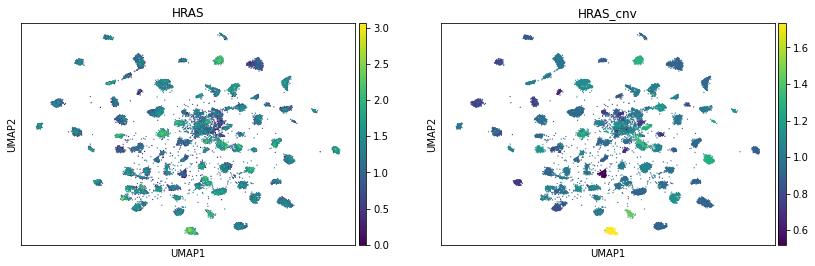

In [66]:
sc.pl.umap(adata_concat, color=['HRAS','HRAS_cnv'])

## Fitting models: MAPK activity

Two models fitted: one with the addition of batches, the other with the multiplicative interaction of the batches.

https://www.statsmodels.org/devel/example_formulas.html

In [67]:
model = smf.ols('MAPK_activity ~ MAPK_mut_count + batch', data=adata_concat.obs).fit()

In [68]:
model.params

Intercept              0.073291
batch[T.Trametinib]   -0.006984
MAPK_mut_count        -0.145674
dtype: float64

In [69]:
model.pvalues

Intercept              3.695655e-08
batch[T.Trametinib]    6.466282e-01
MAPK_mut_count         2.526744e-45
dtype: float64

In [70]:
model = smf.ols('MAPK_activity ~ MAPK_mut_count * batch', data=adata_concat.obs).fit()

In [71]:
model.params

Intercept                            -0.075787
batch[T.Trametinib]                   0.216163
MAPK_mut_count                        0.150636
MAPK_mut_count:batch[T.Trametinib]   -0.459036
dtype: float64

In [72]:
model.pvalues

Intercept                              3.333978e-07
batch[T.Trametinib]                    2.926227e-32
MAPK_mut_count                         1.137776e-18
MAPK_mut_count:batch[T.Trametinib]    2.142853e-102
dtype: float64

## CEVIChE cell viability prediction

Download the necessary
<a href="https://saezlab.shinyapps.io/ceviche/_w_a1dec541/session/b0540761d9da082a04bdf713f386ec99/download/download_achilles_model?w=a1dec541" target="_blank">achilles_model.csv</a>. The common genes are listed, then the *'Predicted_viability'* is calculated and added to the dataframe.

In [73]:
ceviche = pd.read_csv('../data/achilles_model.csv', sep=',', header=0, index_col=0)

In [74]:
common_genes = list(set(adata_concat.var.index) & set(ceviche.index))

In [75]:
len(common_genes)

969

In [76]:
gex = adata_concat.to_df()

In [77]:
gex = gex[common_genes]
ceviche = ceviche.loc[common_genes]

In [78]:
cell_viability = np.dot(gex, ceviche)

In [79]:
cell_viability.shape

(18728, 1)

In [80]:
adata_concat.obs['Predicted_viability'] = cell_viability

The predicted viability is comparable to the MAPK activity and the mutation counts.

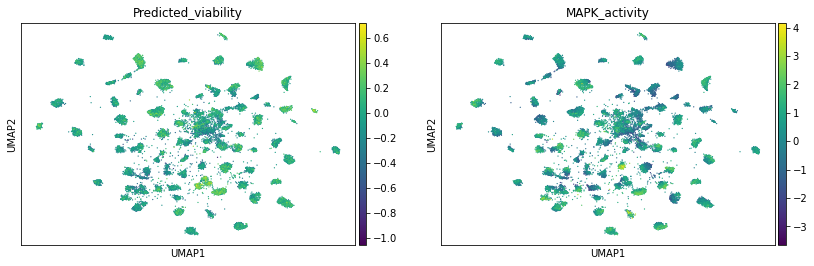

In [81]:
sc.pl.umap( adata_concat, color = ['Predicted_viability', 'MAPK_activity'] )

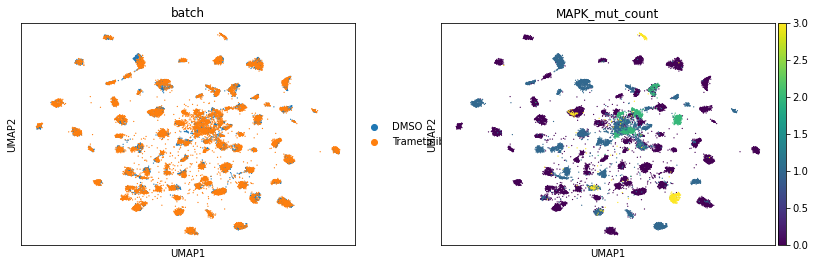

In [82]:
sc.pl.umap( adata_concat, color = ['batch', 'MAPK_mut_count'] )

In [83]:
pearsonr(adata_concat.obs['MAPK_mut_count'], adata_concat.obs['Predicted_viability'])

(-0.019741055794999032, 0.006899593537900886)

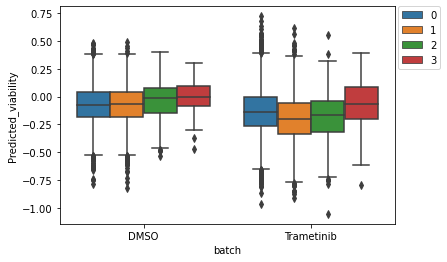

In [84]:
sns.boxplot(hue=adata_concat.obs['MAPK_mut_count'], y=adata_concat.obs['Predicted_viability'], 
            x=adata_concat.obs['batch'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

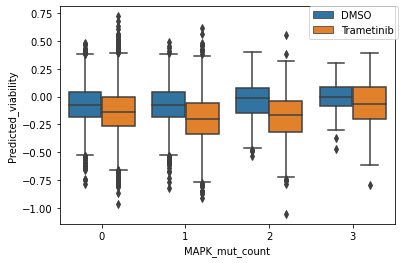

In [85]:
sns.boxplot(hue=adata_concat.obs['batch'], y=adata_concat.obs['Predicted_viability'], 
            x=adata_concat.obs['MAPK_mut_count'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

## Fitting models: cell viability

Two models fitted: one with the addition of batches, the other with the multiplicative interaction of the batches.



In [86]:
model = smf.ols('Predicted_viability ~ MAPK_mut_count + batch', data=adata_concat.obs).fit()

In [87]:
model.params

Intercept             -0.068366
batch[T.Trametinib]   -0.079873
MAPK_mut_count        -0.007293
dtype: float64

In [88]:
model.pvalues

Intercept              1.271687e-148
batch[T.Trametinib]    1.221392e-154
MAPK_mut_count          2.988656e-04
dtype: float64

In [89]:
model = smf.ols('Predicted_viability ~ MAPK_mut_count * batch', data=adata_concat.obs).fit()

In [90]:
model.params

Intercept                            -0.077936
batch[T.Trametinib]                  -0.065548
MAPK_mut_count                        0.011730
MAPK_mut_count:batch[T.Trametinib]   -0.029469
dtype: float64

In [91]:
model.pvalues

Intercept                             9.431245e-152
batch[T.Trametinib]                    9.259045e-73
MAPK_mut_count                         5.250588e-04
MAPK_mut_count:batch[T.Trametinib]     2.635148e-12
dtype: float64